# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

In [1]:
# Letakkan pustaka di sini.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Baca data di sini.
rain_data = pd.read_csv('weatherAUS.csv')

# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [3]:
#1 Ukuran dari data (instansi dan fitur)
print("Size of dataset is " + str(rain_data.shape[0]) +" rows x " + str(rain_data.shape[1]) + " columns")
print("Number of instances: " + str(rain_data.shape[0]))
print("rain_data: " + str(rain_data.shape[1]-1))
rain_data.head()

Size of dataset is 75340 rows x 23 columns
Number of instances: 75340
rain_data: 22


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#2 Tipe dari setiap fitur
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75340 entries, 0 to 75339
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           75340 non-null  object 
 1   Location       75339 non-null  object 
 2   MinTemp        74231 non-null  float64
 3   MaxTemp        74401 non-null  float64
 4   Rainfall       73114 non-null  float64
 5   Evaporation    36513 non-null  float64
 6   Sunshine       29694 non-null  float64
 7   WindGustDir    69222 non-null  object 
 8   WindGustSpeed  69230 non-null  float64
 9   WindDir9am     68438 non-null  object 
 10  WindDir3pm     72539 non-null  object 
 11  WindSpeed9am   73960 non-null  float64
 12  WindSpeed3pm   73347 non-null  float64
 13  Humidity9am    73559 non-null  float64
 14  Humidity3pm    73104 non-null  float64
 15  Pressure9am    64755 non-null  float64
 16  Pressure3pm    64809 non-null  float64
 17  Cloud9am       45277 non-null  float64
 18  Cloud3

In [5]:
#3 Banyak nilai unik dari fitur yang bertipe kategorikal
rain_data["Date"].value_counts() #i dont think date categorical data?

2013-11-12    25
2014-09-01    25
2014-08-23    25
2014-08-24    25
2014-08-25    25
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2              1
Name: Date, Length: 3437, dtype: int64

In [6]:
rain_data["Location"].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Albury              3040
Wollongong          3040
Bendigo             3040
Ballarat            3040
MountGinini         3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Mildura             3009
MelbourneAirport    3009
Sale                3009
Williamtown         3009
BadgerysCreek       3009
WaggaWagga          3009
SydneyAirport       3009
Richmond            3009
NorfolkIsland       3009
Moree               3009
CoffsHarbour        3009
Cobar               3009
NorahHead           3004
Nhil                1578
Portland             359
Name: Location, dtype: int64

In [7]:
rain_data["WindGustDir"].value_counts()

W      5858
S      5629
N      5231
WNW    4853
WSW    4853
SSE    4710
SW     4391
SSW    4379
E      4124
ENE    4047
NE     4045
NW     3953
NNE    3939
SE     3623
ESE    2992
NNW    2595
Name: WindGustDir, dtype: int64

In [8]:
rain_data["WindDir9am"].value_counts()

N      6415
W      5572
SW     5100
NW     4971
WNW    4778
SSW    4482
S      4337
NNE    4244
WSW    4180
SE     3892
SSE    3840
E      3720
NE     3501
NNW    3321
ENE    3245
ESE    2840
Name: WindDir9am, dtype: int64

In [9]:
rain_data["WindDir3pm"].value_counts()

S      5916
W      5554
SE     5183
NE     5064
WNW    5028
N      5013
SSE    4753
WSW    4563
NW     4528
E      4400
SW     3969
SSW    3908
NNE    3749
ESE    3702
ENE    3700
NNW    3509
Name: WindDir3pm, dtype: int64

In [10]:
rain_data["RainToday"].value_counts()

No     57074
Yes    16040
Name: RainToday, dtype: int64

In [11]:
#4 Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal
rain_data[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am", "Temp3pm"]].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,74231.000000,74401.000000,73114.000000,36513.000000,29694.000000,69230.000000,73960.000000,73347.000000,73559.000000,73104.000000,64755.000000,64809.000000,45277.000000,44349.000000,73899.000000,73389.000000
mean,11.285359,22.300712,2.358432,5.250949,7.345787,40.239607,13.931476,18.545762,71.073478,52.053554,1018.256096,1015.872261,4.596837,4.683713,15.831477,20.852501
std,6.245371,6.938866,8.316845,4.168061,3.838359,14.400119,9.434718,9.401671,17.864453,20.731387,7.097149,6.970919,2.912249,2.695660,6.063870,6.747405
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.600000,0.000000,2.600000,4.500000,30.000000,7.000000,11.000000,59.000000,37.000000,1013.600000,1011.200000,1.000000,2.000000,11.500000,16.300000
50%,11.400000,21.900000,0.000000,4.400000,8.200000,39.000000,13.000000,17.000000,72.000000,52.000000,1018.300000,1015.900000,6.000000,5.000000,16.000000,20.400000
75%,16.200000,26.700000,0.600000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,66.000000,1023.000000,1020.600000,7.000000,7.000000,20.400000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

In [12]:
#1. Nilai missing dari setiap fitur
rain_data.isnull().sum()


Date                 0
Location             1
MinTemp           1109
MaxTemp            939
Rainfall          2226
Evaporation      38827
Sunshine         45646
WindGustDir       6118
WindGustSpeed     6110
WindDir9am        6902
WindDir3pm        2801
WindSpeed9am      1380
WindSpeed3pm      1993
Humidity9am       1781
Humidity3pm       2236
Pressure9am      10585
Pressure3pm      10531
Cloud9am         30063
Cloud3pm         30991
Temp9am           1441
Temp3pm           1951
RainToday         2226
RainTomorrow      2225
dtype: int64

In [13]:
#2. Nilai pencilan dari setiap fitur
numeric_data = rain_data[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am", "Temp3pm"]]
LowOutliner = 0
HighOutliner = 0

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))
print(outliers.sum())

MinTemp             13
MaxTemp           1090
Rainfall         14572
Evaporation       1096
Sunshine             0
WindGustSpeed     1575
WindSpeed9am      1286
WindSpeed3pm       923
Humidity9am        323
Humidity3pm          0
Pressure9am        528
Pressure3pm        480
Cloud9am             0
Cloud3pm             0
Temp9am            239
Temp3pm           1285
dtype: int64


## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

<ipython-input-14-7c6cedba092e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = rain_data.corr()


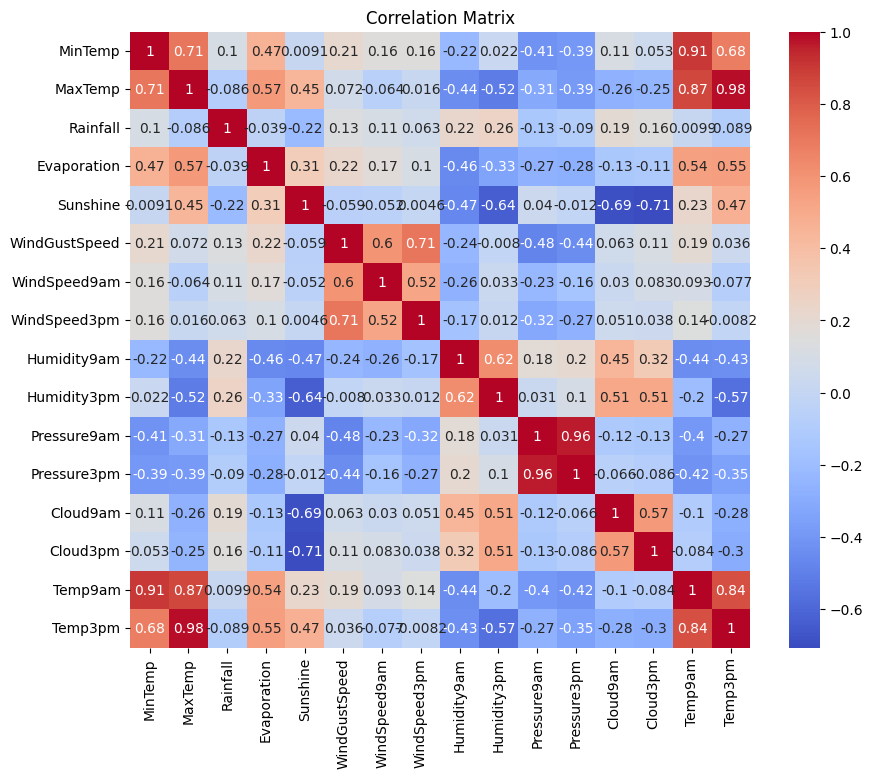

In [14]:
#1 Pencarian korelasi antarfitur
corr = rain_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

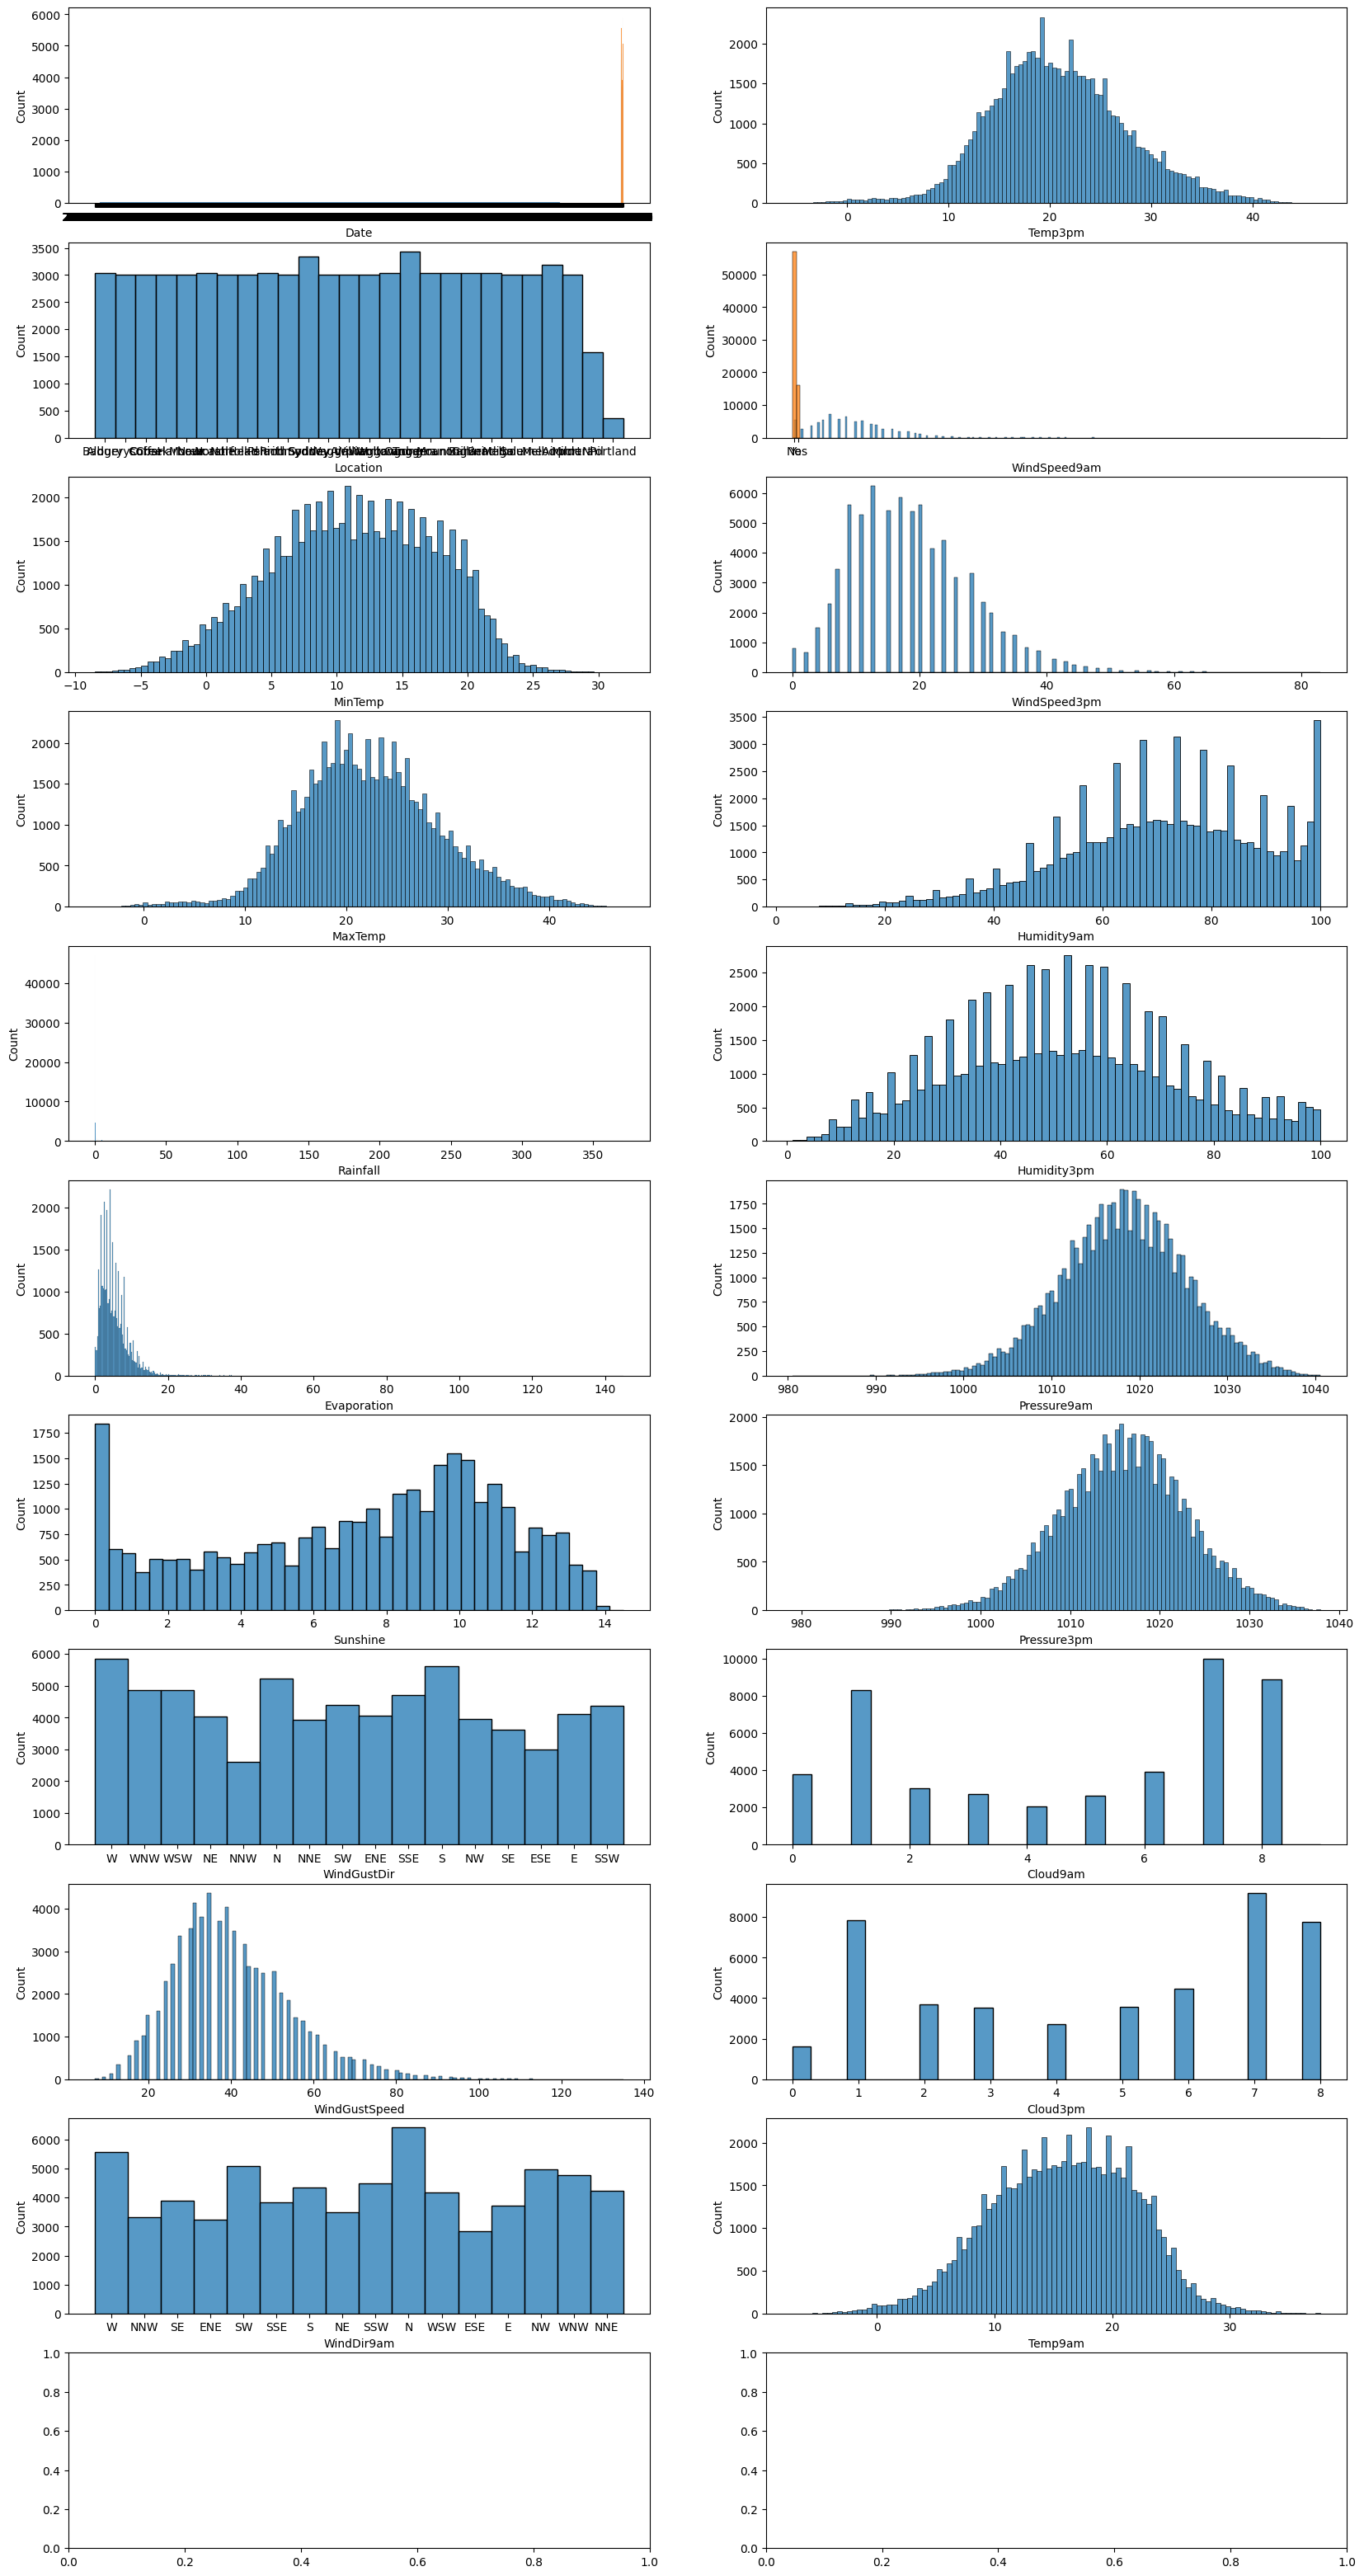

In [15]:
# 2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
columns = ["Date","Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday"]

fig, axs = plt.subplots(11, 2, figsize=(20, 40))
j = 0
for i in range(len(columns)):
    sns.histplot(rain_data, x=columns[i], ax=axs[(i % 10), j])
    if (i%11) == 10:
        j += 1  

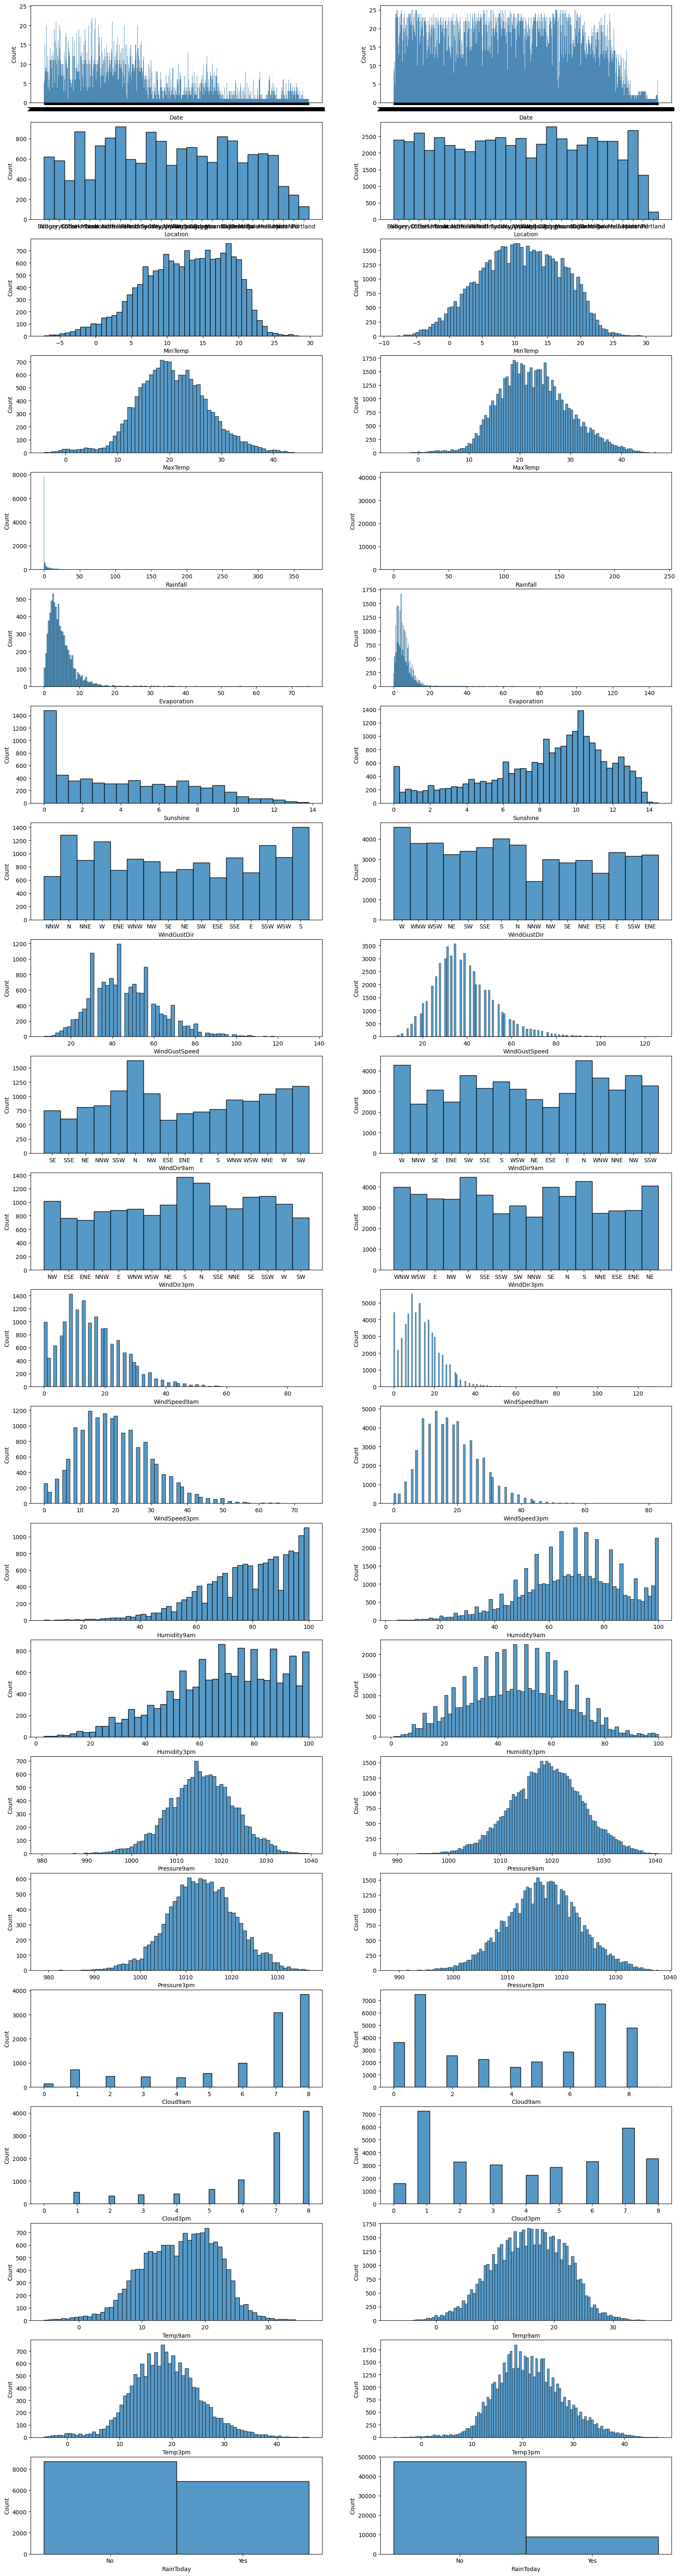

In [16]:
# 3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)
yes_data = rain_data[rain_data["RainTomorrow"] == "Yes"]
no_data = rain_data[rain_data["RainTomorrow"] == "No"]

fig, axs = plt.subplots(22, 2, figsize=(20, 80))

for i in range(len(columns)):
    sns.histplot(yes_data, x=(columns[i]), ax=axs[(i), 0])
    sns.histplot(no_data, x=(columns[i]), ax=axs[(i), 1])

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

1. Penambahan fitur jika memungkinkan
#####Tidak ada

2.Pembuangan fitur yang menurut kalian tidak dibutuhkan

In [17]:
rain_data = rain_data.drop(["Date", "Location"], axis=1)

3. Penanganan nilai hilang

In [18]:
#MinTemp 
median = rain_data.median(numeric_only=True)['MinTemp']
rain_data['MinTemp'] = rain_data['MinTemp'].fillna(median)

#MaxTemp
median = rain_data.median(numeric_only=True)['MaxTemp']
rain_data['MaxTemp'] = rain_data['MaxTemp'].fillna(median)

#Rainfall
median = rain_data.median(numeric_only=True)['Rainfall']
rain_data['Rainfall'] = rain_data['Rainfall'].fillna(median)

#Evaporation
median = rain_data.median(numeric_only=True)['Evaporation']
rain_data['Evaporation'] = rain_data['Evaporation'].fillna(median)

#Sunshine
median = rain_data.median(numeric_only=True)['Sunshine']
rain_data['Sunshine'] = rain_data['Sunshine'].fillna(median)

#WindGustSpeed
median = rain_data.median(numeric_only=True)['WindGustSpeed']
rain_data['WindGustSpeed'] = rain_data['WindGustSpeed'].fillna(median)

#WindSpeed9am
median = rain_data.median(numeric_only=True)['WindSpeed9am']
rain_data['WindSpeed9am'] = rain_data['WindSpeed9am'].fillna(median)

#WindSpeed3pm
median = rain_data.median(numeric_only=True)['WindSpeed3pm']
rain_data['WindSpeed3pm'] = rain_data['WindSpeed3pm'].fillna(median)

#Humidity9am
median = rain_data.median(numeric_only=True)['Humidity9am']
rain_data['Humidity9am'] = rain_data['Humidity9am'].fillna(median)

##Humidity3pm
median = rain_data.median(numeric_only=True)['Humidity3pm']
rain_data['Humidity3pm'] = rain_data['Humidity3pm'].fillna(median)

#Pressure9am
median = rain_data.median(numeric_only=True)['Pressure9am']
rain_data['Pressure9am'] = rain_data['Pressure9am'].fillna(median)

#Pressure3pm
median = rain_data.median(numeric_only=True)['Pressure3pm']
rain_data['Pressure3pm'] = rain_data['Pressure3pm'].fillna(median)

#Cloud9am
median = rain_data.median(numeric_only=True)['Cloud9am']
rain_data['Cloud9am'] = rain_data['Cloud9am'].fillna(median)

#Cloud3pm
median = rain_data.median(numeric_only=True)['Cloud3pm']
rain_data['Cloud3pm'] = rain_data['Cloud3pm'].fillna(median)

#Temp9am
median = rain_data.median(numeric_only=True)['Temp9am']
rain_data['Temp9am'] = rain_data['Temp9am'].fillna(median)

#Temp3pm
median = rain_data.median(numeric_only=True)['Temp3pm']
rain_data['Temp3pm'] = rain_data['Temp3pm'].fillna(median)

#WindGustDir 
modus = rain_data.mode()['WindGustDir'][0]
rain_data['WindGustDir'] = rain_data['WindGustDir'].fillna(modus)

# WindDir9am
modus = rain_data.mode()['WindDir9am'][0]
rain_data['WindDir9am'] = rain_data['WindDir9am'].fillna(modus)

# WindDir3pm
modus = rain_data.mode()['WindDir3pm'][0]
rain_data['WindDir3pm'] = rain_data['WindDir3pm'].fillna(modus)

# RainToday
modus = rain_data.mode()['RainToday'][0]
rain_data['RainToday'] = rain_data['RainToday'].fillna(modus)

# RainTomorrow
modus = rain_data.mode()['RainTomorrow'][0]
rain_data['RainTomorrow'] = rain_data['RainTomorrow'].fillna(modus)

4. Transformasi data kategorikal menjadi numerikal (encoding)

In [19]:
from sklearn.preprocessing import LabelEncoder
# inisiasi objek LabelEncoder
le = LabelEncoder()

#WindGustDir 
rain_data['WindGustDir'] = le.fit_transform(rain_data['WindGustDir'])

#WindDir9am
rain_data['WindDir9am'] = le.fit_transform(rain_data['WindDir9am'])

#WindDir3pm
rain_data['WindDir3pm'] = le.fit_transform(rain_data['WindDir3pm'])

#RainToday
rain_data['RainToday'] = le.fit_transform(rain_data['RainToday'])

#RainTomorrow
rain_data['RainTomorrow'] = le.fit_transform(rain_data['RainTomorrow'])

5.Scaling dengan MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
rain_data = pd.DataFrame(scale.fit_transform(rain_data), columns=rain_data.columns)

rain_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.542079,0.531670,0.001617,0.030345,0.565517,0.866667,0.289062,0.866667,0.933333,0.153846,...,0.701031,0.212121,0.452579,0.477080,0.888889,0.625,0.536748,0.522073,0.0,0.0
1,0.393564,0.573896,0.000000,0.030345,0.565517,0.933333,0.289062,0.400000,1.000000,0.030769,...,0.422680,0.242424,0.500832,0.488964,0.666667,0.625,0.543430,0.570058,0.0,0.0
2,0.529703,0.585413,0.000000,0.030345,0.565517,1.000000,0.304688,0.866667,1.000000,0.146154,...,0.360825,0.292929,0.450915,0.504244,0.666667,0.250,0.628062,0.548944,0.0,0.0
3,0.438119,0.629559,0.000000,0.030345,0.565517,0.266667,0.132812,0.600000,0.000000,0.084615,...,0.432990,0.151515,0.617304,0.573854,0.666667,0.625,0.563474,0.612284,0.0,0.0
4,0.643564,0.712092,0.002695,0.030345,0.565517,0.866667,0.265625,0.066667,0.466667,0.053846,...,0.814433,0.323232,0.504160,0.458404,0.777778,1.000,0.556793,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75335,0.371287,0.522073,0.000000,0.048276,0.903448,0.600000,0.187500,0.733333,0.000000,0.069231,...,0.649485,0.585859,0.554077,0.563667,0.666667,0.500,0.516704,0.514395,0.0,0.0
75336,0.564356,0.790787,0.000000,0.040000,0.544828,0.933333,0.382812,0.000000,1.000000,0.115385,...,0.773196,0.313131,0.462562,0.412564,0.555556,0.875,0.561247,0.710173,0.0,0.0
75337,0.638614,0.462572,0.001078,0.111724,0.379310,1.000000,0.351562,0.866667,1.000000,0.153846,...,0.958763,0.666667,0.399334,0.517827,0.888889,0.875,0.545657,0.464491,0.0,1.0
75338,0.502475,0.420345,0.014016,0.012414,0.565517,0.800000,0.218750,0.533333,0.533333,0.100000,...,0.577320,0.494949,0.623960,0.674024,0.888889,0.375,0.465479,0.418426,1.0,0.0


# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

Accuracy, F1, Precision, Recall

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

clasification = rain_data['RainTomorrow']
rain_data = rain_data.drop(["RainTomorrow"], axis=1)

X_train, X_test, y_train, y_test = train_test_split( rain_data,clasification, test_size=0.2, random_state=42)


## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
print('Precision:', precision)

recall = recall_score(y_test, y_pred)
print('Recall:', recall)

f1 = f1_score(y_test, y_pred)
print('F1:', f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.844770374303159
Precision: 0.713317191283293
Recall: 0.4574534161490683
F1: 0.5574266792809838


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[11256,   592],
       [ 1747,  1473]])

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [23]:
# III.1 Kode di sini.

## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

(Tuliskan hasil eksplorasi III.2 poin 1 di sini.)

In [24]:
# III.2 Kode di sini.

# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)